In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
%matplotlib inline
plt.style.use('ggplot')
# Disable Python INFO and WARNING messages
warnings.filterwarnings('ignore')

In [2]:
# Load real estate data 
df = pd.read_csv('data/real_estate_data.csv')

## 1. Dataset basic information

In [3]:
# check the overall dataset structure 
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [4]:
df.head()

tx_price  beds  baths  sqft  year_built  lot_size  \
0    295850     1      1   584        2013         0   
1    216500     1      1   612        1965         0   
2    279900     1      1   615        1963         0   
3    379900     1      1   618        2000     33541   
4    340000     1      1   634        1992         0   

                   property_type exterior_walls                 roof  \
0  Apartment / Condo / Townhouse    Wood Siding                  NaN   
1  Apartment / Condo / Townhouse          Brick  Composition Shingle   
2  Apartment / Condo / Townhouse    Wood Siding                  NaN   
3  Apartment / Condo / Townhouse    Wood Siding                  NaN   
4  Apartment / Condo / Townhouse          Brick                  NaN   

   basement  restaurants  groceries  nightlife  cafes  shopping  \
0       NaN          107          9         30     19        89   
1       1.0          105         15          6     13        87   
2       NaN          183         13         31     30       101   
3       NaN          198          9         38     25       127   
4       NaN          149          7         22     20        83   

   arts_entertainment  beauty_spas  active_life  median_age  married  \
0                   6           47           58        33.0     65.0   
1                   2           26           14        39.0     73.0   
2                  10           74           62        28.0     15.0   
3                  11           72           83        36.0     25.0   
4                  10           50           73        37.0     20.0   

   college_grad  property_tax  insurance  median_school  num_schools  tx_year  
0          84.0         234.0       81.0            9.0          3.0     2013  
1          69.0         169.0       51.0            3.0          3.0     2006  
2          86.0         216.0       74.0            8.0          3.0     2012  
3          91.0         265.0       92.0            9.0          3.0     2005  
4          75.0          88.0       30.0            9.0          3.0     2002

## 2. Distributions of numerical features

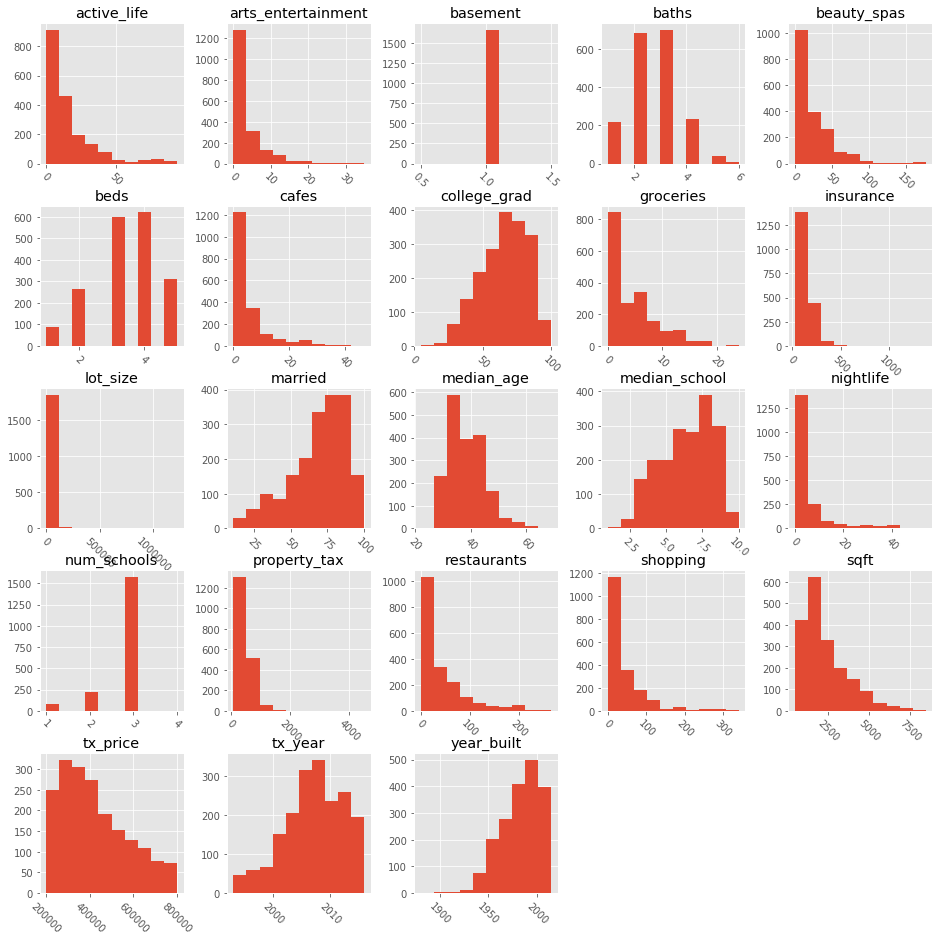

In [5]:
# Plot histogram grid -- check numerical features
df.hist(figsize=(16,16), xrot=-45)
plt.show()

In [6]:
# numerical features statistics
df.describe()

tx_price         beds        baths         sqft   year_built  \
count    1883.000000  1883.000000  1883.000000  1883.000000  1883.000000   
mean   422839.807754     3.420605     2.579926  2329.398832  1982.963887   
std    151462.593276     1.068554     0.945576  1336.991858    20.295945   
min    200000.000000     1.000000     1.000000   500.000000  1880.000000   
25%    300000.000000     3.000000     2.000000  1345.000000  1970.000000   
50%    392000.000000     3.000000     3.000000  1907.000000  1986.000000   
75%    525000.000000     4.000000     3.000000  3005.000000  2000.000000   
max    800000.000000     5.000000     6.000000  8450.000000  2015.000000   

           lot_size  basement  restaurants    groceries    nightlife  \
count  1.883000e+03    1657.0  1883.000000  1883.000000  1883.000000   
mean   1.339262e+04       1.0    40.210303     4.505045     5.074881   
std    4.494930e+04       0.0    46.867012     4.491029     8.464668   
min    0.000000e+00       1.0     0.000000     0.000000     0.000000   
25%    1.542000e+03       NaN     7.000000     1.000000     0.000000   
50%    6.098000e+03       NaN    23.000000     3.000000     2.000000   
75%    1.176100e+04       NaN    58.000000     7.000000     6.000000   
max    1.220551e+06       1.0   266.000000    24.000000    54.000000   

             cafes     shopping  arts_entertainment  beauty_spas  active_life  \
count  1883.000000  1883.000000         1883.000000  1883.000000  1883.000000   
mean      5.325013    40.802443            3.394052    23.416888    15.835369   
std       7.539309    53.539296            4.699787    25.776916    17.667717   
min       0.000000     0.000000            0.000000     0.000000     0.000000   
25%       0.000000     6.000000            0.000000     4.000000     4.000000   
50%       3.000000    22.000000            2.000000    15.000000    10.000000   
75%       6.000000    51.000000            5.000000    35.000000    21.000000   
max      47.000000   340.000000           35.000000   177.000000    94.000000   

        median_age      married  college_grad  property_tax    insurance  \
count  1883.000000  1883.000000   1883.000000   1883.000000  1883.000000   
mean     38.601168    69.091875     65.085502    466.777483   140.454063   
std       6.634110    19.659767     16.953165    231.656645    72.929765   
min      22.000000    11.000000      5.000000     88.000000    30.000000   
25%      33.000000    58.000000     54.000000    320.000000    94.000000   
50%      38.000000    73.000000     66.000000    426.000000   125.000000   
75%      43.000000    84.000000     78.000000    569.000000   169.000000   
max      69.000000   100.000000    100.000000   4508.000000  1374.000000   

       median_school  num_schools      tx_year  
count    1883.000000  1883.000000  1883.000000  
mean        6.502921     2.793415  2007.111524  
std         1.996109     0.505358     5.196898  
min         1.000000     1.000000  1993.000000  
25%         5.000000     3.000000  2004.000000  
50%         7.000000     3.000000  2007.000000  
75%         8.000000     3.000000  2011.000000  
max        10.000000     4.000000  2016.000000

In [7]:
# categorical features statistics
df.describe(include=['object'])

property_type exterior_walls                 roof
count            1883           1660                 1529
unique              2             16                   16
top     Single-Family          Brick  Composition Shingle
freq             1080            687                 1179

## 3. Distribution of categorical features

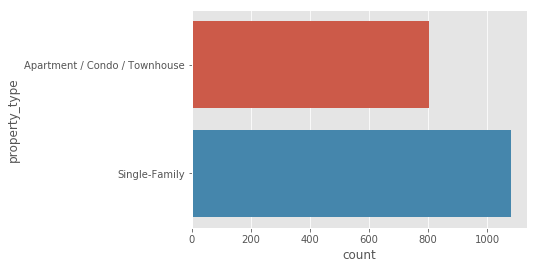

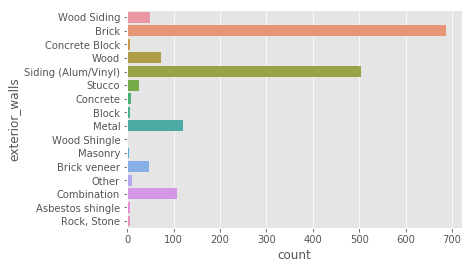

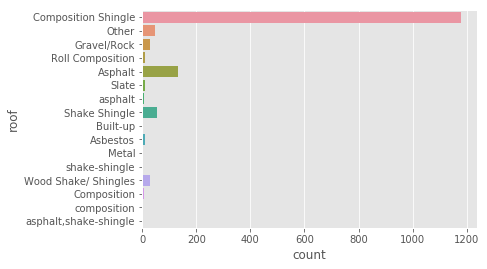

In [8]:
# bar plot for each categorical feature
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

## 4. Segmentations

**Goal** : It will help us check relationships between our target feature (real estate price) and key numerical and categorical features.

#### Univariate segmentations :

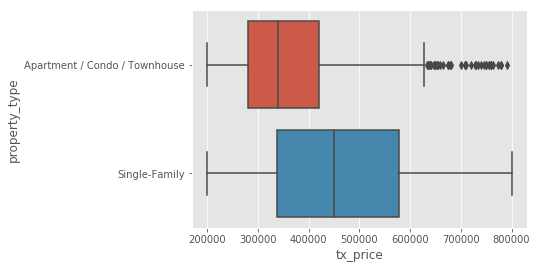

In [9]:
# Segment our target feature tx_price by property_type and plot distributions
sns.boxplot(y='property_type', x='tx_price', data=df)
plt.show()

In [10]:
# Segment by property_type and display the means and standard deviations within each class
df.groupby('property_type').agg(['mean', 'std'])

tx_price                     beds            \
                                  mean            std      mean       std   
property_type                                                               
Apartment / Condo / Townhouse   366614  121784.490482  2.601494  0.810220   
Single-Family                   464644  157758.739010  4.029630  0.795639   

                                  baths                   sqft               \
                                   mean       std         mean          std   
property_type                                                                 
Apartment / Condo / Townhouse  2.200498  0.815009  1513.727273   556.285898   
Single-Family                  2.862037  0.937551  2935.865741  1422.871041   

                                year_built                 lot_size  \
                                      mean        std          mean   
property_type                                                         
Apartment / Condo / Townhouse  1988.936488  15.513640   3944.239103   
Single-Family                  1978.523148  22.210582  20417.666667   

                                            basement      restaurants  \
                                        std     mean  std        mean   
property_type                                                           
Apartment / Condo / Townhouse  44284.168763      1.0  0.0   58.418431   
Single-Family                  44165.529296      1.0  0.0   26.672222   

                                         groceries           nightlife  \
                                     std      mean       std      mean   
property_type                                                            
Apartment / Condo / Townhouse  54.343594  5.919054  4.645774  7.855542   
Single-Family                  34.726416  3.453704  4.067285  3.007407   

                                             cafes             shopping  \
                                     std      mean       std       mean   
property_type                                                             
Apartment / Condo / Townhouse  10.643816  8.037360  9.077038  57.631382   
Single-Family                   5.543822  3.308333  5.325053  28.289815   

                                         arts_entertainment            \
                                     std               mean       std   
property_type                                                           
Apartment / Condo / Townhouse  61.852299           4.840598  5.234834   
Single-Family                  42.292313           2.318519  3.929691   

                              beauty_spas            active_life             \
                                     mean        std        mean        std   
property_type                                                                 
Apartment / Condo / Townhouse   32.087173  26.910443   22.410959  21.058178   
Single-Family                   16.970370  22.872112   10.946296  12.599296   

                              median_age              married             \
                                    mean       std       mean        std   
property_type                                                              
Apartment / Condo / Townhouse  37.199253  6.906584  57.534247  20.372706   
Single-Family                  39.643519  6.225732  77.685185  13.868205   

                              college_grad            property_tax  \
                                      mean        std         mean   
property_type                                                        
Apartment / Condo / Townhouse    66.372354  17.095874   346.261519   
Single-Family                    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47.118015   
Single-Family

## 5. Correlations

**Goal** : Show relationships between numerical features

In [11]:
# Calculate correlations between numerical features
correlations = df.corr()
correlations

tx_price      beds     baths      sqft  year_built  \
tx_price            1.000000  0.384046  0.389375  0.469573    0.033138   
beds                0.384046  1.000000  0.644572  0.691039   -0.011844   
baths               0.389375  0.644572  1.000000  0.682060    0.206141   
sqft                0.469573  0.691039  0.682060  1.000000    0.254589   
year_built          0.033138 -0.011844  0.206141  0.254589    1.000000   
lot_size            0.130558  0.164399  0.132976  0.246016    0.000068   
basement                 NaN       NaN       NaN       NaN         NaN   
restaurants        -0.038027 -0.495834 -0.350210 -0.353759   -0.106948   
groceries          -0.094314 -0.421412 -0.340024 -0.371167   -0.222443   
nightlife           0.009361 -0.440844 -0.306686 -0.281540   -0.080006   
cafes              -0.001398 -0.464289 -0.316836 -0.300969   -0.102209   
shopping           -0.038246 -0.388670 -0.259603 -0.275586   -0.121684   
arts_entertainment -0.021076 -0.442168 -0.305885 -0.293402   -0.195141   
beauty_spas        -0.054349 -0.419832 -0.282008 -0.310465   -0.163670   
active_life        -0.001165 -0.486957 -0.329736 -0.332663   -0.134919   
median_age          0.126335  0.133711  0.095844  0.109811   -0.237152   
married             0.200494  0.643240  0.442225  0.480167    0.038208   
college_grad        0.268577 -0.082354  0.016097  0.065343   -0.014204   
property_tax        0.535148  0.547643  0.525776  0.660264   -0.046504   
insurance           0.532947  0.485776  0.475430  0.594049   -0.109521   
median_school       0.175762  0.137309  0.163365  0.220669    0.155835   
num_schools        -0.014380 -0.124359 -0.088299 -0.102032   -0.188106   
tx_year             0.108782 -0.174081 -0.132110 -0.236190   -0.043301   

                    lot_size  basement  restaurants  groceries  nightlife  \
tx_price            0.130558       NaN    -0.038027  -0.094314   0.009361   
beds                0.164399       NaN    -0.495834  -0.421412  -0.440844   
baths               0.132976       NaN    -0.350210  -0.340024  -0.306686   
sqft                0.246016       NaN    -0.353759  -0.371167  -0.281540   
year_built          0.000068       NaN    -0.106948  -0.222443  -0.080006   
lot_size            1.000000       NaN    -0.113887  -0.118574  -0.072224   
basement                 NaN       NaN          NaN        NaN        NaN   
restaurants        -0.113887       NaN     1.000000   0.701462   0.926675   
groceries          -0.118574       NaN     0.701462   1.000000   0.565003   
nightlife          -0.072224       NaN     0.926675   0.565003   1.000000   
cafes              -0.098182       NaN     0.937616   0.602857   0.923901   
shopping           -0.116560       NaN     0.818815   0.526356   0.743321   
arts_entertainment -0.067189       NaN     0.726907   0.502837   0.703038   
beauty_spas        -0.121075       NaN     0.867829   0.626850   0.777461   
active_life        -0.092668       NaN     0.881799   0.574532   0.858836   
median_age          0.099140       NaN    -0.063816  -0.022377  -0.028611   
married             0.122028       NaN    -0.615584  -0.508793  -0.568811   
college_grad       -0.030725       NaN     0.214260  -0.006025   0.253717   
property_tax        0.165800       NaN    -0.100821  -0.159506  -0.054386   
insurance           0.146579       NaN    -0.019925  -0.093974   0.024551   
median_school       0.096551       NaN    -0.068425  -0.354553  -0.036948   
num_schools        -0.031535       NaN     0.251171   0.272856   0.196399   
tx_year            -0.048207       NaN     0.044739   0.115674   0.027495   

                       cafes  shopping  arts_entertainment  beauty_spas  \
tx_price           -0.001398 -0.038246           -0.021076    -0.054349   
beds               -0.464289 -0.388670           -0.442168    -0.419832   
baths              -0.316836 -0.259603           -0.305885    -0.282008   
sqft               -0.300969 -0.275586           -0.293402    -0.310465   
year_built         

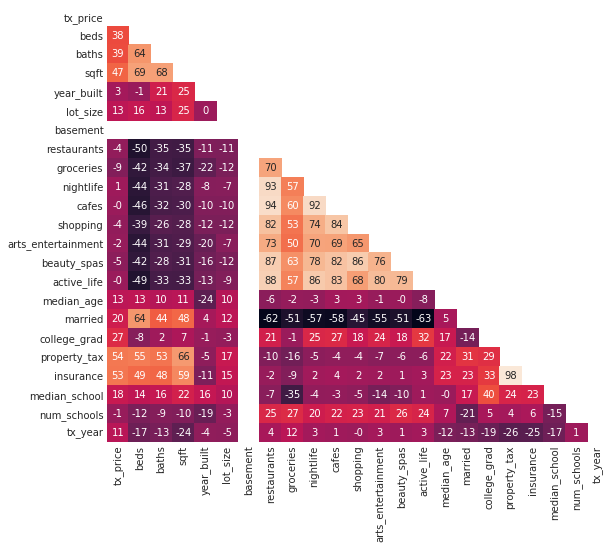

In [13]:
# Change color scheme
sns.set_style("white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Make the figsize 9 x 8
plt.figure(figsize=(9,8))

# Plot heatmap of correlations
sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cbar=False)
plt.show()